In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import matplotlib.style as style

In [2]:
health = "Resources/2.12_Health_systems.csv"
happiness16 = "Resources/2016.csv"

health_df = pd.read_csv(health)
happiness16_df = pd.read_csv(happiness16)

In [3]:
health_df

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,US,Virgin Islands,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN
207,NaN,NaN,"Yemen, Rep.",5.6,10.2,81.0,72.0,144.5,7.8,0.3,0.7,0.8,30.7,NaN
208,Zambia,NaN,Zambia,4.5,38.3,12.1,56.5,175.2,42.5,0.1,0.9,1.5,11.3,NaN


In [4]:
health_rename = health_df.rename(columns = {"Country_Region" : "Country", 
                                            "Health_exp_pct_GDP_2016" : "Health Expenditure % - GDP",         
                                            "Health_exp_public_pct_2016": "Health Expenditure Public %", 
                                            "Health_exp_out_of_pocket_pct_2016" : "Health EXP Out of Pocket %", 
                                            "External_health_exp_pct_2016" : "External Health Expenditure %", 
                                            "Physicians_per_1000_2009-18" : "Physicians per 1000",
                                            "Nurse_midwife_per_1000_2009-18" : "Nurse Midwife per 1000",
                                            "Specialist_surgical_per_1000_2008-18" : "Specialist Surgical per 1000",
                                            "Completeness_of_birth_reg_2009-18" : "Completeness of Birth Reg",
                                            "Completeness_of_death_reg_2008-16" : "Completeness of Death Reg", 
                                            "per_capita_exp_PPP_2016" : "Per Capita Expeniture by PPP",                       
                                            "Health_exp_per_capita_USD_2016" : "Health Expenditure Per Capita($)"
                                            })


In [5]:
happiness16_df.rename(columns = {'Country':'Country'})

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [6]:
merged_dfs = pd.merge(happiness16_df, health_rename, on ='Country', how ='left')


In [7]:
dropped_dup_merged_dfs = merged_dfs.drop_duplicates(subset =['Country'], keep = 'first').reset_index(drop= True)
dropped_dup_merged_dfs

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Health Expenditure Public %,Health EXP Out of Pocket %,Health Expenditure Per Capita($),Per Capita Expeniture by PPP,External Health Expenditure %,Physicians per 1000,Nurse Midwife per 1000,Specialist Surgical per 1000,Completeness of Birth Reg,Completeness of Death Reg
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,84.1,13.7,5565.6,5093.0,NaN,4.5,10.3,69.0,100.0,98.0
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,...,62.8,29.6,9836.0,7867.4,NaN,4.2,17.3,94.8,100.0,100.0
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,...,81.5,16.9,5063.6,4245.1,0.0,4.0,15.7,101.6,100.0,100.0
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,...,85.1,14.5,7477.9,6203.5,0.0,4.6,18.1,67.2,100.0,100.0
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,...,77.4,20.4,4117.3,4112.1,0.0,3.8,14.7,76.3,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,...,20.5,43.5,30.4,83.5,30.5,0.2,0.6,1.9,85.6,NaN
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,...,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,...,20.0,50.4,38.8,99.9,20.7,0.0,0.3,0.5,78.0,NaN
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,...,NaN,NaN,NaN,NaN,NaN,1.2,1.5,NaN,NaN,92.0


In [8]:
dropped_dup_merged_dfs.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Health Expenditure Public %,Health EXP Out of Pocket %,Health Expenditure Per Capita($),Per Capita Expeniture by PPP,External Health Expenditure %,Physicians per 1000,Nurse Midwife per 1000,Specialist Surgical per 1000,Completeness of Birth Reg,Completeness of Death Reg
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,134.000000,134.000000,134.000000,134.000000,119.000000,136.000000,136.000000,122.000000,122.000000,85.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,...,52.090299,34.925373,1110.798507,1510.117910,6.725210,1.826471,4.338971,41.187705,85.500820,88.518824
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,...,21.393558,18.207945,1758.468717,1685.631164,11.554302,1.486345,4.178165,40.643234,23.502131,19.751019
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.100000,5.200000,18.500000,34.500000,0.000000,0.000000,0.100000,0.000000,2.700000,4.000000
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,...,36.625000,20.475000,91.950000,246.950000,0.100000,0.400000,1.000000,3.700000,80.025000,87.000000
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,...,54.550000,33.300000,333.800000,892.250000,1.100000,1.600000,2.600000,31.200000,98.200000,99.000000
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,...,69.625000,46.375000,1135.325000,1985.350000,6.850000,3.000000,6.525000,67.600000,100.000000,100.000000
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,...,85.100000,80.600000,9836.000000,7867.400000,50.600000,5.400000,18.100000,163.500000,100.000000,100.000000


In [9]:
quartiles = dropped_dup_merged_dfs["Health (Life Expectancy)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Life Expectancy is: {lowerq}")
print(f"The upper quartile of Life Expectancy is: {upperq}")
print(f"The interquartile range of Life Expectancy is: {iqr}")
print(f"The the median of Life Expectancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Life Expectancy is: 0.38291
The upper quartile of Life Expectancy is: 0.72993
The interquartile range of Life Expectancy is: 0.34702
The the median of Life Expectancy is: 0.59659 
Values below -0.13761999999999996 could be outliers.
Values above 1.25046 could be outliers.


In [10]:
quartiles = dropped_dup_merged_dfs["Health EXP Out of Pocket %"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Health EXP Out of Pocket % is: {lowerq}")
print(f"The upper quartile of Health EXP Out of Pocket % is: {upperq}")
print(f"The interquartile range of Health EXP Out of Pocket % is: {iqr}")
print(f"The the median of Health EXP Out of Pocket % is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Health EXP Out of Pocket % is: 20.474999999999998
The upper quartile of Health EXP Out of Pocket % is: 46.375
The interquartile range of Health EXP Out of Pocket % is: 25.900000000000002
The the median of Health EXP Out of Pocket % is: 33.3 
Values below -18.375000000000004 could be outliers.
Values above 85.225 could be outliers.


In [11]:
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x_values, y_values)
    
    print(f"r-squared: {rvalue**2}")
    print(f"Correlation: {correlation}")
    print(f"Line: {line_eq}")

    return regress_values, line_eq

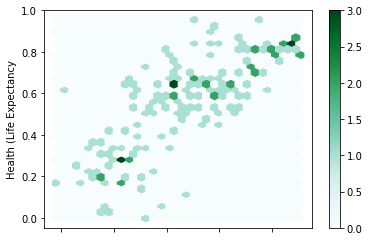

In [12]:
df = pd.DataFrame({'Happiness Score': dropped_dup_merged_dfs["Happiness Score"],
                   'Health (Life Expectancy': dropped_dup_merged_dfs["Health (Life Expectancy)"]})
ax = df.plot.hexbin(x='Happiness Score', y='Health (Life Expectancy', gridsize=30)


In [13]:
dropped_dup_merged_dfs.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Health Expenditure Public %,Health EXP Out of Pocket %,Health Expenditure Per Capita($),Per Capita Expeniture by PPP,External Health Expenditure %,Physicians per 1000,Nurse Midwife per 1000,Specialist Surgical per 1000,Completeness of Birth Reg,Completeness of Death Reg
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,134.000000,134.000000,134.000000,134.000000,119.000000,136.000000,136.000000,122.000000,122.000000,85.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,...,52.090299,34.925373,1110.798507,1510.117910,6.725210,1.826471,4.338971,41.187705,85.500820,88.518824
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,...,21.393558,18.207945,1758.468717,1685.631164,11.554302,1.486345,4.178165,40.643234,23.502131,19.751019
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.100000,5.200000,18.500000,34.500000,0.000000,0.000000,0.100000,0.000000,2.700000,4.000000
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,...,36.625000,20.475000,91.950000,246.950000,0.100000,0.400000,1.000000,3.700000,80.025000,87.000000
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,...,54.550000,33.300000,333.800000,892.250000,1.100000,1.600000,2.600000,31.200000,98.200000,99.000000
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,...,69.625000,46.375000,1135.325000,1985.350000,6.850000,3.000000,6.525000,67.600000,100.000000,100.000000
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,...,85.100000,80.600000,9836.000000,7867.400000,50.600000,5.400000,18.100000,163.500000,100.000000,100.000000


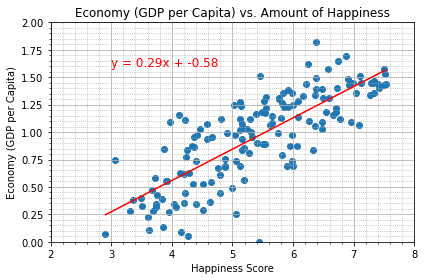

The r-squared is: 0.6246088901220198


In [14]:
x_values = dropped_dup_merged_dfs["Happiness Score"]
y_values = dropped_dup_merged_dfs["Economy (GDP per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Economy (GDP per Capita) vs. Amount of Happiness')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,1.6),fontsize=12,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.ylim(0, 2)
plt.xlim(2, 8)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-squared is: {rvalue**2}")

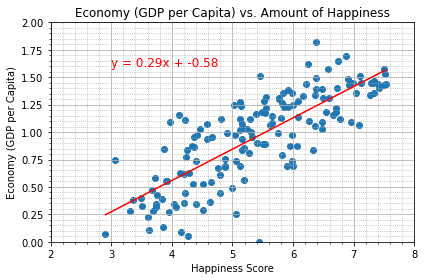

The r-squared is: 0.6246088901220198


In [15]:
x_values = dropped_dup_merged_dfs["Happiness Score"]
y_values = dropped_dup_merged_dfs["Economy (GDP per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Economy (GDP per Capita) vs. Amount of Happiness')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,1.6),fontsize=12,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.ylim(0, 2)
plt.xlim(2, 8)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-squared is: {rvalue**2}")

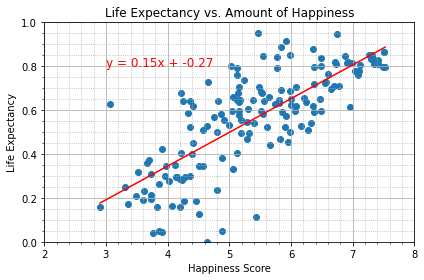

The r-squared is: 0.585813179396469


In [16]:
x_values = dropped_dup_merged_dfs["Happiness Score"]
y_values = dropped_dup_merged_dfs["Health (Life Expectancy)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Life Expectancy vs. Amount of Happiness')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,.8),fontsize=12,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')
plt.ylim(0, 1)
plt.xlim(2, 8)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [17]:
import gmaps
import gmaps.geojson_geometries
from config import gkey
gmaps.configure(api_key=gkey)

In [18]:
country_name = []
lat = []
lng = []

for country in dropped_dup_merged_dfs["Country"]:

    
    target_country = country

    params = {"address": target_country, "key": gkey}

    # Build URL using the Google Maps API
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    # Run request
    response = requests.get(base_url, params=params)

#     # Convert to JSON
    country_geo = response.json()

#     # Extract lat/lng
    #country_loop = country_geo["results"][0]["address_components"][6]["long_name"]
    lat_loop = country_geo["results"][0]["geometry"]["location"]["lat"]
    lng_loop = country_geo["results"][0]["geometry"]["location"]["lng"]
    
    country_name.append(country_geo["results"][0]["address_components"][0]["long_name"])
    lat.append(country_geo["results"][0]["geometry"]["location"]["lat"])
    lng.append(country_geo["results"][0]["geometry"]["location"]["lng"])

    # Print results
    print(f"{target_country}: {lat_loop}, {lng_loop}")


Denmark: 56.26392, 9.501785
Switzerland: 46.818188, 8.227511999999999
Iceland: 64.963051, -19.020835
Norway: 60.47202399999999, 8.468945999999999
Finland: 61.92410999999999, 25.7481511
Canada: 56.130366, -106.346771
Netherlands: 52.132633, 5.291265999999999
New Zealand: -40.900557, 174.885971
Australia: -25.274398, 133.775136
Sweden: 60.12816100000001, 18.643501
Israel: 31.046051, 34.851612
Austria: 47.516231, 14.550072
United States: 37.09024, -95.712891
Costa Rica: 9.748916999999999, -83.753428
Puerto Rico: 18.220833, -66.590149
Germany: 51.165691, 10.451526
Brazil: -14.235004, -51.92528
Belgium: 50.503887, 4.469936
Ireland: 53.1423672, -7.692053599999999
Luxembourg: 49.815273, 6.129582999999999
Mexico: 23.634501, -102.552784
Singapore: 1.352083, 103.819836
United Kingdom: 55.378051, -3.435973
Chile: -35.675147, -71.542969
Panama: 8.537981, -80.782127
Argentina: -38.416097, -63.61667199999999
Czech Republic: 49.81749199999999, 15.472962
United Arab Emirates: 23.424076, 53.847818
Urug

In [19]:
countries_dict = {
    "Country": country_name,
    "Lat": lat,
    "Lng": lng
}
geo_data = pd.DataFrame(countries_dict)
geo_data.head()


,Country,Lat,Lng
0,Denmark,56.263920,9.501785
1,Switzerland,46.818188,8.227512
2,Iceland,64.963051,-19.020835
3,Norway,60.472024,8.468946
4,Finland,61.924110,25.748151


In [20]:
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')

fig = gmaps.figure()

# gini_layer = gmaps.geojson_layer(countries_geojson)
# fig.add_layer(gini_layer)

locations = geo_data[["Lat", "Lng"]].astype(float)
happiness = dropped_dup_merged_dfs["Happiness Score"].astype(float)

heat_layer = gmaps.heatmap_layer(locations, weights=happiness, 
                                 dissipating=False, max_intensity=15,
                                  point_radius = 3)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [21]:
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')

fig = gmaps.figure()

# gini_layer = gmaps.geojson_layer(countries_geojson)
# fig.add_layer(gini_layer)

locations = geo_data[["Lat", "Lng"]].astype(float)
expectancy = dropped_dup_merged_dfs["Health (Life Expectancy)"].astype(float)

heat_layer = gmaps.heatmap_layer(locations, weights=expectancy, 
                                 dissipating=False, max_intensity=1,
                                  point_radius = 3)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [22]:
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')

fig = gmaps.figure()

# gini_layer = gmaps.geojson_layer(countries_geojson)
# fig.add_layer(gini_layer)

locations = geo_data[["Lat", "Lng"]].astype(float)
public = dropped_dup_merged_dfs["Health EXP Out of Pocket %"].astype(float)

heat_layer = gmaps.heatmap_layer(locations, weights=public, 
                                 dissipating=False, max_intensity=50,
                                  point_radius = 3)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))